hello home!
Shape of train set is (159, 2)
Shape of test set is (40, 2)
Shape of train label is (159, 1)
Shape of test labels is (40, 1)


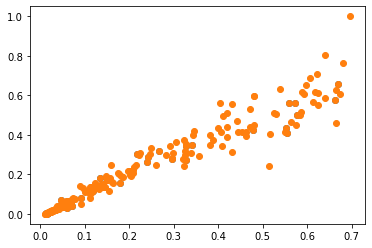

In [53]:
#prepare data downloaded from UCL
import tensorflow as tf
import xlrd
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from keras import Sequential
from tensorflow import lite
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
import copy
from tensorflow.keras import activations


print("hello home!")
# add header names
headers =  ["ertefaae_sine",'ertefaae_kol', 'result']
heart_df = pd.read_excel('trees.xlsx',sheet_name='Vol_Zaraieb_1', usecols=headers)

#convert imput to numpy arrays
X = heart_df.drop(columns=['result'])

y_label = heart_df['result'].values.reshape(X.shape[0], 1)
# print("heart_df['result']: {}".format(heart_df['result'], '2.4f'))
# print("Xtrain shib: {}".format(Xtrain['shib'], '2.4f'))


#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)
# print("ytrain: {}".format(ytrain, '2.4f'))

originalResults = copy.deepcopy(ytrain);
#standardize the dataset
scX = preprocessing.MinMaxScaler()
scX.fit(Xtrain)
Xtrain = scX.transform(Xtrain)
Xtest = scX.transform(Xtest)
# print(f"Xtrain is: {Xtrain}")

scY = preprocessing.MinMaxScaler()
scY.fit(ytrain)

ytrain = scY.transform(ytrain)
ytest = scY.transform(ytest)
print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

# define the model
model = Sequential()
model.add(Dense(3, input_shape=(2,)))
# model.add(Dropout())
model.add(Dense(1, activation= activations.sigmoid ))

# compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mae', metrics=['accuracy','mse'])

hist = model.fit(Xtrain, ytrain, epochs=700, verbose=0,shuffle=True, validation_split=0.1, batch_size=40)



# train_pred = model.predict(Xtrain)
test_pred = model.predict(Xtest)
y_scaled = scY.transform(y_label)

X = scX.transform(X)
complete_pred = model.predict(X)


# print("Train accuracy of keras neural network: {}".format(mean_squared_error(train_pred, ytrain)))
# print("Test accuracy of keras neural network: {}".format(mean_squared_error(test_pred, ytest)))
# print("\n")
# print(heart_df.head())

plt.scatter(test_pred, ytest)
plt.scatter(complete_pred, y_scaled)
#print(f"test_pred is: {test_pred}")
#print(f"ytest is: {ytest}")

# keras_file='cf.h5'
# models.save_model(model,keras_file)
# converter=tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(keras_file)
# tfmodel = converter.convert()
# open("degree.tflite","wb").write(tfmodel)

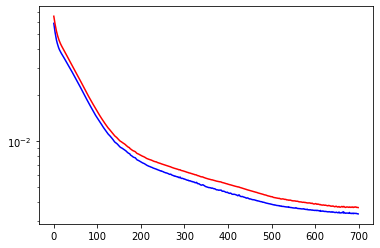

In [41]:
plt.plot(hist.history['mse'],c='blue')
plt.plot(hist.history['val_mse'], c='red')
plt.yscale('log',basey=10) 


In [42]:
import copy
sampleInput = [[436,15.3],[480,17.4],[504,15.8],[30,480,14.2,260],[45,3706,31,1696]];
sampleInput = scX.transform(sampleInput)
sampleInputResult = model.predict(sampleInput)
sampleInputResult *= 1.5
# scRev = preprocessing.MinMaxScaler()
# scRev.fit(originalResults)

def reverseMinMaxScale(data, originalData):
    reversedData = copy.deepcopy(data)
    min = originalData.min()
    max = originalData.max()
    print(f"min is: {min}")
    print(f"max is: {max}")
    index = 0;
    for item in reversedData: 
        reversedData[index] = (item * (max - min)) + min
        index+=1
    return reversedData;
        

print("Scaled results are: {}".format(sampleInputResult, '2.4f'))
print("Manual Reverse scaled predicted results are: {}".format(reverseMinMaxScale(sampleInputResult, originalResults), '2.4f'))
print("inverse_transform results are: {}".format(scY.inverse_transform(sampleInputResult), '2.4f'))


print("expected (original) results are: {}".format([0.090,0.103,0.114,0.087,19.391], '2.4f'))

model.summary()


Scaled results are: [[0.01944137]
 [0.02193502]
 [0.02262703]
 [0.02123192]
 [0.8023895 ]]
min is: 0.09
max is: 31.914
Manual Reverse scaled predicted results are: [[ 0.7087021 ]
 [ 0.78805995]
 [ 0.81008244]
 [ 0.7656846 ]
 [25.625244  ]]
inverse_transform results are: [[ 0.708702  ]
 [ 0.78805995]
 [ 0.81008244]
 [ 0.7656846 ]
 [25.625244  ]]
expected (original) results are: [0.09, 0.103, 0.114, 0.087, 19.391]
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_pred = model.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_pred, ytest)

In [ ]:
plt.scatter(test_pred, ytest)

In [ ]:
np.max(ytrain), np.min(ytrain)

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
plt.figure(figsize=(15,4))
plt.plot(hist.history['mse'], c='red')
plt.plot(hist.history['val_mse'], c='blue')

NameError: name 'plt' is not defined